Max accuracy score:
0.9375


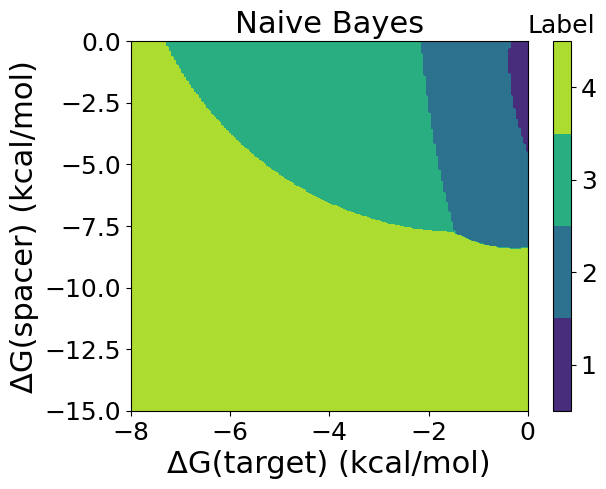

In [4]:
# Naive Bayes-logarithm difference-ssDNA (77 targets)-60 nM-spacer + target

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import seaborn as sns

# Input logarithm of trans-cleavage rate and energy data
crRNA_short = [-7.5986, -7.9136, -13.0978, -13.7063, -5.4186, -9.5198, -10.3969, -14.6313, -5.2037, -6.2136, -5.7124, -11.9929, -3.8269, -3.6281, -7.8096, -7.5159, -2.7415, -2.9822, -6.325, -5.2217, -2.7343, -2.7278, -4.2134, -4.23, -0.1286, -0.1312, -0.1262, -0.114, -0.2125]
crRNA_long = [-7.5986, -7.9136, -13.0978, -13.7063, -0.1286, -0.1262, -0.114, -0.2125, -5.4186, -9.5198, -10.3969, -14.6313, -0.1312, -0.1262, -0.114, -0.2125, -5.2037, -6.2136, -5.7124, -11.9929, -0.1312, -0.1262, -0.114, -0.2125, -3.8269, -3.6281, -7.8096, -7.5159, -0.1312, -0.1262, -0.114, -0.2125, -2.7415, -2.9822, -6.325, -5.2217, -0.1312, -0.1262, -0.114, -0.2125, -2.7343, -2.7278, -4.2134, -4.23, -0.1312, -0.1262, -0.114, -0.2125]

DNA_short = [-3.729, -1.5845, -4.546, -4.983, -3.477, -3.5708, -0.6474, -7.7395, -2.5788, -0.3742, -2.6783, -5.4146, -1.835, -0.3073, -3.9449, -1.812, -0.952, -0.2431, -1.9231, -0.4985, -0.5696, -0.5424, -1.5467, -1.5761, -0.1835, -0.1166, -0.1512, -0.0723, -0.374]
DNA_long = [-3.3092, -1.1093, -5.5261, -4.3378, 0.3363, -1.5971, -4.0898, -0.9542, -2.9901, -3.5997, 0.5946, -8.0181, 0.4028, -1.3072, -3.9041, -1.0676, -2.1199, 0.5894, -2.1163, -5.2779, 0.4773, -1.2496, -3.8546, -0.9702, -1.373, 0.6586, -4.0277, -3.1558, 0.2156, -0.1158, -1.4255, -4.0676, -0.201, -1.4468, -7.214, -2.7169, 0.3884, -0.8365, -3.4617, -2.3248, -0.9932, -2.6728, -2.2828, -2.1059, 0.3698, -1.2188, -3.6771, -1.0626]

rate_short = [0.74999, 2.92414, 0.9369, 0.94607, 1.82063, 1.42018, 3.21536, -1, 2.21983, 3.52545, 3.46257, 0.0851, 3.11362, 3.47337, 1.91024, 3.08837, 3.22065, 3.49578, 3.33369, 3.19545, 3.23225, 3.27768, 3.28911, 3.16849, 3.44665, 3.50358, 3.40417, 3.30497, 3.29992]
rate_long = [1.61041, 2.39507, -0.70309, 0.72694, 2.97138, 3.04819, 2.80491, 2.83112, 2.63976, 1.55271, 2.398, -1, 3.0623, 3.09264, 2.82318, 2.58749, 2.76825, 3.24625, 2.66222, 0.9431, 3.15163, 3.1303, 3.07722, 2.95174, 3.04572, 3.19892, 2.17761, 2.43041, 3.00227, 3.06187, 2.86628, 2.6737, 3.21738, 3.05514, 2.72836, 3.0101, 3.14338, 3.28634, 3.05054, 3.00324, 2.97693, 2.93967, 2.49717, 2.69684, 3.05162, 2.95531, 2.745, 2.69177]

max_rate_short = max(rate_short)
max_rate_long = max(rate_long)

rate_dif = []

# Calculate rate differences
for j in range (0, len(rate_short)):
    rate_difference = max_rate_short - rate_short[j] 
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)
    
for j in range (0, len(rate_long)):
    rate_difference = max_rate_long - rate_long[j]
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)

# Combine the data from short and long strands, the standard rate (highest) was different for short and long targets 
crRNA = crRNA_short + crRNA_long
DNA = DNA_short + DNA_long

X = []
X_unit = []
Y = []

# Labeling thresholds are set as the 25th, 50th, 75th percentile of log difference of trans-cleavage rates
quartile = int(len(rate_dif)/4)
sorted_rate_dif = sorted(rate_dif)


# Labeling with 4 labels
for i in range (0, len(crRNA)):
    X_unit.append(crRNA[i])
    X_unit.append(DNA[i])
    X.append(X_unit)
    X_unit = []
    if rate_dif[i] <= sorted_rate_dif[quartile-1]:
        Y.append(0)
    elif rate_dif[i] <= sorted_rate_dif[2*quartile-1]:
        Y.append(1)
    elif rate_dif[i] <= sorted_rate_dif[3*quartile-1]:
        Y.append(2)
    else:
        Y.append(3)
    
        
# Naive Bayes Classification and accuracy test
clf = GaussianNB()
print("Max accuracy score:")

# Perform 10000 trials for model training, get the model with the highest accuracy score
score = 0
r = 0
max_r = 0
max_score = 0
with open('output.txt', 'w') as f:
    while r < 10000:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=r)    # train: test = 4: 1
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = accuracy_score(y_test, preds)
        f.write(str(score) + '\n')
        if score > max_score:
            max_score = score
            max_r = r
        r += 1

print(max_score)   

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=max_r)    # train: test = 4: 1
clf.fit(X_train, y_train)

# Prediction of classification results for every energy combination throughout the map
Z_value = []
Z_value_unit = []
for m in np.arange(-15, 0, 0.05):
    for n in np.arange(-8, 0, 0.05):
        prediction = clf.predict([[m,n]])
        Z_value_unit.append(prediction[0])
        
    Z_value.append(Z_value_unit)
    Z_value_unit = []

# Create the map
n = 4
ylist = np.linspace(-15, 0, 300)
xlist = np.linspace(-8, 0, 160)
X_plot, Y_plot = np.meshgrid(xlist, ylist)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X_plot, Y_plot, Z_value, levels = list(range(-1, n)))
cbar = fig.colorbar(cp, ticks=np.linspace(0,n-1,n), spacing = 'proportional' ) # Add a colorbar to a plot
tick_locs = np.linspace(-1, n-1, 2 * n + 1)[1::2]
cbar_tick_label = np.arange(1, n+1)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(cbar_tick_label)

from textwrap import wrap 
char_tick_title = 'Label'
char_tick_title =  '\n'.join(wrap(char_tick_title, 8))
cbar.ax.set_title(char_tick_title, fontsize = 18)
cbar.ax.tick_params(labelsize=18)
ax.set_title('Naive Bayes', fontsize = 22)
ax.set_xlabel('ΔG(target) (kcal/mol)', fontsize = 22)
ax.set_ylabel('ΔG(spacer) (kcal/mol)', fontsize = 22)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()


Max accuracy score:
0.875


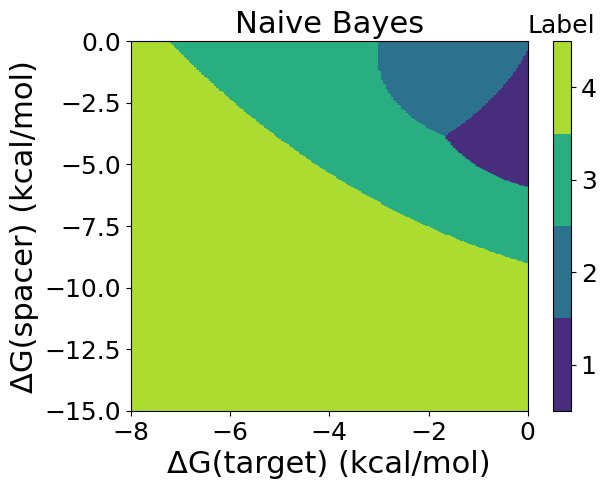

In [2]:
# Naive Bayes-logarithm difference-ssDNA (77 targets)-6 nM-spacer + target

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import seaborn as sns

# Input logarithm of trans-cleavage rate and energy data
crRNA_short = [-7.5986, -7.9136, -13.0978, -13.7063, -5.4186, -9.5198, -10.3969, -14.6313, -5.2037, -6.2136, -5.7124, -11.9929, -3.8269, -3.6281, -7.8096, -7.5159, -2.7415, -2.9822, -6.325, -5.2217, -2.7343, -2.7278, -4.2134, -4.23, -0.1286, -0.1312, -0.1262, -0.114, -0.2125]
crRNA_long = [-7.5986, -7.9136, -13.0978, -13.7063, -0.1286, -0.1262, -0.114, -0.2125, -5.4186, -9.5198, -10.3969, -14.6313, -0.1312, -0.1262, -0.114, -0.2125, -5.2037, -6.2136, -5.7124, -11.9929, -0.1312, -0.1262, -0.114, -0.2125, -3.8269, -3.6281, -7.8096, -7.5159, -0.1312, -0.1262, -0.114, -0.2125, -2.7415, -2.9822, -6.325, -5.2217, -0.1312, -0.1262, -0.114, -0.2125, -2.7343, -2.7278, -4.2134, -4.23, -0.1312, -0.1262, -0.114, -0.2125]

DNA_short = [-3.729, -1.5845, -4.546, -4.983, -3.477, -3.5708, -0.6474, -7.7395, -2.5788, -0.3742, -2.6783, -5.4146, -1.835, -0.3073, -3.9449, -1.812, -0.952, -0.2431, -1.9231, -0.4985, -0.5696, -0.5424, -1.5467, -1.5761, -0.1835, -0.1166, -0.1512, -0.0723, -0.374]
DNA_long = [-3.3092, -1.1093, -5.5261, -4.3378, 0.3363, -1.5971, -4.0898, -0.9542, -2.9901, -3.5997, 0.5946, -8.0181, 0.4028, -1.3072, -3.9041, -1.0676, -2.1199, 0.5894, -2.1163, -5.2779, 0.4773, -1.2496, -3.8546, -0.9702, -1.373, 0.6586, -4.0277, -3.1558, 0.2156, -0.1158, -1.4255, -4.0676, -0.201, -1.4468, -7.214, -2.7169, 0.3884, -0.8365, -3.4617, -2.3248, -0.9932, -2.6728, -2.2828, -2.1059, 0.3698, -1.2188, -3.6771, -1.0626]

rate_short = [-1, 2.61633, -0.5011, -0.48816, 0.88024, -0.34514, 2.77505, -1, 1.39694, 3.13047, 3.14885, -1, 2.52339, 3.09036, 0.80304, 2.5952, 2.64645, 3.28507, 2.91951, 2.96013, 2.7354, 3.09433, 2.97987, 2.71399, 3.11449, 3.11243, 3.10775, 2.97171, 3.15861]
rate_long = [1.72835, 2.57734, 0.55117, 0.01462, 2.38942, 2.47027, 2.3538, 2.4708, 2.87604, 1.69769, 2.31272, -1, 2.60403, 2.43818, 2.35319, 2.4187, 2.34315, 3.07568, 2.55683, -0.17353, 2.7003, 2.7844, 2.70431, 2.75633, 2.96165, 2.96995, 1.68934, 2.09749, 2.69098, 2.53757, 2.45888, 2.43664, 3.01239, 2.7708, 2.37918, 2.3908, 2.75999, 2.77006, 2.59073, 2.6846, 3.05061, 3.04769, 2.78607, 2.73223, 2.89054, 2.84042, 2.78704, 2.77866]

max_rate_short = max(rate_short)
max_rate_long = max(rate_long)

rate_dif = []

# Calculate rate differences
for j in range (0, len(rate_short)):
    rate_difference = max_rate_short - rate_short[j] 
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)
    
for j in range (0, len(rate_long)):
    rate_difference = max_rate_long - rate_long[j]
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)

# Combine the data from short and long strands, the standard rate (highest) was different for short and long targets 
crRNA = crRNA_short + crRNA_long
DNA = DNA_short + DNA_long

X = []
X_unit = []
Y = []


# Labeling thresholds are set as the 25th, 50th, 75th percentile of log difference of trans-cleavage rates
quartile = int(len(rate_dif)/4)
sorted_rate_dif = sorted(rate_dif)


# Labeling with 4 labels
for i in range (0, len(crRNA)):
    X_unit.append(crRNA[i])
    X_unit.append(DNA[i])
    X.append(X_unit)
    X_unit = []
    if rate_dif[i] <= sorted_rate_dif[quartile-1]:
        Y.append(0)
    elif rate_dif[i] <= sorted_rate_dif[2*quartile-1]:
        Y.append(1)
    elif rate_dif[i] <= sorted_rate_dif[3*quartile-1]:
        Y.append(2)
    else:
        Y.append(3)
    
        
# Naive Bayes Classification and accuracy test
clf = GaussianNB()
print("Max accuracy score:")

# Perform 10000 trials for model training, get the model with the highest accuracy score
score = 0
r = 0
max_r = 0
max_score = 0

with open('output.txt', 'w') as f:
    while r < 10000:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=r)    # train: test = 4: 1
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = accuracy_score(y_test, preds)
        f.write(str(score) + '\n')
        if score > max_score:
            max_score = score
            max_r = r
        r += 1

print(max_score)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=max_r)    # train: test = 4: 1
clf.fit(X_train, y_train)

# Prediction of classification results for every energy combination throughout the map
Z_value = []
Z_value_unit = []
for m in np.arange(-15, 0, 0.05):
    for n in np.arange(-8, 0, 0.05):
        prediction = clf.predict([[m,n]])
        Z_value_unit.append(prediction[0])
        
    Z_value.append(Z_value_unit)
    Z_value_unit = []


# Create the map
n = 4
ylist = np.linspace(-15, 0, 300)
xlist = np.linspace(-8, 0, 160)
X_plot, Y_plot = np.meshgrid(xlist, ylist)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X_plot, Y_plot, Z_value, levels = list(range(-1, n)))
cbar = fig.colorbar(cp, ticks=np.linspace(0,n-1,n), spacing = 'proportional' ) # Add a colorbar to a plot
tick_locs = np.linspace(-1, n-1, 2 * n + 1)[1::2]
cbar_tick_label = np.arange(1, n+1)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(cbar_tick_label)

from textwrap import wrap 
char_tick_title = 'Label'
char_tick_title =  '\n'.join(wrap(char_tick_title, 8))
cbar.ax.set_title(char_tick_title, fontsize = 18)
cbar.ax.tick_params(labelsize=18)
ax.set_title('Naive Bayes', fontsize = 22)
ax.set_xlabel('ΔG(target) (kcal/mol)', fontsize = 22)
ax.set_ylabel('ΔG(spacer) (kcal/mol)', fontsize = 22)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()



Max accuracy score:
0.875


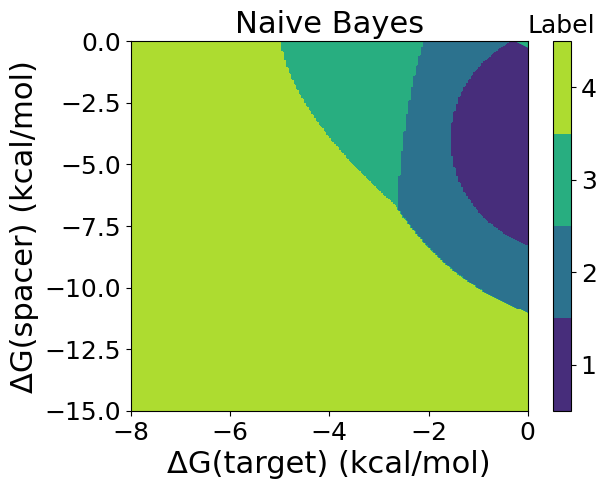

In [3]:
# Naive Bayes-logarithm difference-ssDNA (77 targets)-600 pM-spacer + target

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import seaborn as sns

# Input logarithm of trans-cleavage rate and energy data
crRNA_short = [-7.5986, -7.9136, -13.0978, -13.7063, -5.4186, -9.5198, -10.3969, -14.6313, -5.2037, -6.2136, -5.7124, -11.9929, -3.8269, -3.6281, -7.8096, -7.5159, -2.7415, -2.9822, -6.325, -5.2217, -2.7343, -2.7278, -4.2134, -4.23, -0.1286, -0.1312, -0.1262, -0.114, -0.2125]
crRNA_long = [-7.5986, -7.9136, -13.0978, -13.7063, -0.1286, -0.1262, -0.114, -0.2125, -5.4186, -9.5198, -10.3969, -14.6313, -0.1312, -0.1262, -0.114, -0.2125, -5.2037, -6.2136, -5.7124, -11.9929, -0.1312, -0.1262, -0.114, -0.2125, -3.8269, -3.6281, -7.8096, -7.5159, -0.1312, -0.1262, -0.114, -0.2125, -2.7415, -2.9822, -6.325, -5.2217, -0.1312, -0.1262, -0.114, -0.2125, -2.7343, -2.7278, -4.2134, -4.23, -0.1312, -0.1262, -0.114, -0.2125]

DNA_short = [-3.729, -1.5845, -4.546, -4.983, -3.477, -3.5708, -0.6474, -7.7395, -2.5788, -0.3742, -2.6783, -5.4146, -1.835, -0.3073, -3.9449, -1.812, -0.952, -0.2431, -1.9231, -0.4985, -0.5696, -0.5424, -1.5467, -1.5761, -0.1835, -0.1166, -0.1512, -0.0723, -0.374]
DNA_long = [-3.3092, -1.1093, -5.5261, -4.3378, 0.3363, -1.5971, -4.0898, -0.9542, -2.9901, -3.5997, 0.5946, -8.0181, 0.4028, -1.3072, -3.9041, -1.0676, -2.1199, 0.5894, -2.1163, -5.2779, 0.4773, -1.2496, -3.8546, -0.9702, -1.373, 0.6586, -4.0277, -3.1558, 0.2156, -0.1158, -1.4255, -4.0676, -0.201, -1.4468, -7.214, -2.7169, 0.3884, -0.8365, -3.4617, -2.3248, -0.9932, -2.6728, -2.2828, -2.1059, 0.3698, -1.2188, -3.6771, -1.0626]

rate_short = [-1, 1.88846, -1, -1, -1, -0.57356, 1.5058, -1, -1, 1.76669, 1.84435, -1, 1.01352, 1.56052, -1, 1.47409, 1.52443, 1.37974, 1.12841, 1.56316, 1.4894, 1.29897, 1.66851, 1.07674, 1.67592, 1.82681, 1.97693, 1.34153, 1.79451]
rate_long = [1.15231, 2.03489, -1, -0.53201, 1.45447, 1.69772, 1.35647, 1.66488, 2.19383, 1.16716, 1.66206, -1, 1.75583, 1.56713, 1.3238, 1.48061, 1.69583, 2.32187, 1.87989, -1, 1.86532, 1.94448, 1.89746, 2.03421, 2.31504, 2.40192, 1.00502, 1.34107, 1.92617, 1.69931, 1.38279, 1.47595, 2.33087, 2.09432, 1.76251, 1.59037, 1.95256, 1.94089, 1.78121, 1.8165, 2.53181, 2.73964, 2.31188, 2.28092, 2.30962, 2.27799, 2.07021, 2.29538]

max_rate_short = max(rate_short)
max_rate_long = max(rate_long)

rate_dif = []

# Calculate rate differences
for j in range (0, len(rate_short)):
    rate_difference = max_rate_short - rate_short[j] 
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)
    
for j in range (0, len(rate_long)):
    rate_difference = max_rate_long - rate_long[j]
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)

# Combine the data from short and long strands, the standard rate (highest) was different for short and long targets 
crRNA = crRNA_short + crRNA_long
DNA = DNA_short + DNA_long

X = []
X_unit = []
Y = []


# Labeling thresholds are set as the 25th, 50th, 75th percentile of log difference of trans-cleavage rates
quartile = int(len(rate_dif)/4)
sorted_rate_dif = sorted(rate_dif)


# Labeling with 4 labels
for i in range (0, len(crRNA)):
    X_unit.append(crRNA[i])
    X_unit.append(DNA[i])
    X.append(X_unit)
    X_unit = []
    if rate_dif[i] <= sorted_rate_dif[quartile-1]:
        Y.append(0)
    elif rate_dif[i] <= sorted_rate_dif[2*quartile-1]:
        Y.append(1)
    elif rate_dif[i] <= sorted_rate_dif[3*quartile-1]:
        Y.append(2)
    else:
        Y.append(3)
    
        
# Naive Bayes Classification and accuracy test
clf = GaussianNB()
print("Max accuracy score:")

# Perform 10000 trials for model training, get the model with the highest accuracy score
score = 0
r = 0
max_r = 0
max_score = 0

with open('output.txt', 'w') as f:
    while r < 10000:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=r)    # train: test = 4: 1
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = accuracy_score(y_test, preds)
        f.write(str(score) + '\n')
        if score > max_score:
            max_score = score
            max_r = r
        r += 1

print(max_score)    

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=max_r)    # train: test = 4: 1
clf.fit(X_train, y_train)

# Prediction of classification results for every energy combination throughout the map
Z_value = []
Z_value_unit = []
for m in np.arange(-15, 0, 0.05):
    for n in np.arange(-8, 0, 0.05):
        prediction = clf.predict([[m,n]])
        Z_value_unit.append(prediction[0])
        
    Z_value.append(Z_value_unit)
    Z_value_unit = []


# Create the map
n = 4
ylist = np.linspace(-15, 0, 300)
xlist = np.linspace(-8, 0, 160)
X_plot, Y_plot = np.meshgrid(xlist, ylist)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X_plot, Y_plot, Z_value, levels = list(range(-1, n)))
cbar = fig.colorbar(cp, ticks=np.linspace(0,n-1,n), spacing = 'proportional' ) # Add a colorbar to a plot
tick_locs = np.linspace(-1, n-1, 2 * n + 1)[1::2]
cbar_tick_label = np.arange(1, n+1)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(cbar_tick_label)

from textwrap import wrap 
char_tick_title = 'Label'
char_tick_title =  '\n'.join(wrap(char_tick_title, 8))
cbar.ax.set_title(char_tick_title, fontsize = 18)
cbar.ax.tick_params(labelsize=18)
ax.set_title('Naive Bayes', fontsize = 22)
ax.set_xlabel('ΔG(target) (kcal/mol)', fontsize = 22)
ax.set_ylabel('ΔG(spacer) (kcal/mol)', fontsize = 22)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()


Max accuracy score:
0.72


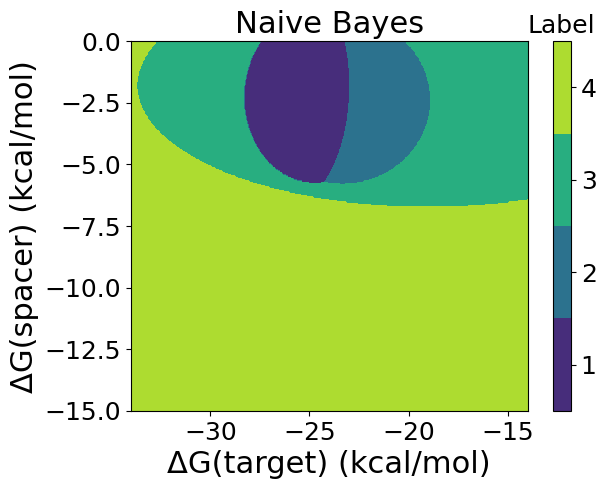

In [5]:
# Naive Bayes-logarithm difference-dsDNA (123 targets)-spacer + target

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import seaborn as sns

# Input logarithm of trans-cleavage rate and energy data
crRNA_original = [-7.5986, -7.9136, -13.0978, -13.7063, -5.4186, -9.5198, -10.3969, -14.6313, -5.2037, -6.2136, -5.7124, -11.9929, -3.8269, -3.6281, -7.8096, -7.5159, -2.7415, -2.9822, -6.325, -5.2217, -2.7343, -2.7278, -4.2134, -4.23, -0.1286, -0.1312, -0.1262, -0.114, -0.2125]
crRNA_extended = [-3.6872, -3.9132, -3.3497, -3.2977, -3.3687, -3.8769, -3.8655, -3.4915, -2.2941, -2.7709, -2.0829, -2.308, -2.0249, -2.9116, -2.2937, -2.5156, -1.9188, -1.4921, -1.4302, -1.5092, -1.1792, -1.1723, -1.3806, -1.0133, -0.8267, -0.9036, -0.9313, -0.8257, -0.4946, -0.5453, -0.7953, -0.6239]
DNA_original = [-17.5571, -22.1671, -26.6771, -31.8671, -20.5671, -22.2371, -27.5471, -31.9571, -20.4571, -22.4471, -28.0871, -31.6471, -20.2571, -22.1071, -27.6571, -32.3471, -18.6971, -23.4871, -27.9871, -31.5371, -20.5171, -22.9171, -28.3971, -32.4171, -19.1371, -20.2371, -22.7871, -25.9971, -31.0671]
DNA_extended = [-26.3971, -29.0371, -24.0471, -24.9971, -23.9871, -23.9871, -19.6371, -20.8171, -26.1171, -27.0371, -24.4971, -24.0871, -22.4171, -22.3371, -20.1271, -19.1071, -26.5471, -26.2171, -25.0571, -24.6371, -22.7471, -22.0271, -17.6171, -20.8171, -27.3071, -26.9571, -24.3571, -24.4971, -22.2671, -22.4871, -16.0771, -20.7471]
crRNA_1 = crRNA_original + crRNA_extended
DNA_1 = DNA_original + DNA_extended

crRNA_2 = [-10.21043, -10.31897, -3.59107, -6.04227, -1.92992, -0.84662, -2.33374, -10.0419, -5.10094, -1.40912, -3.64113, -5.31798, -7.74933, -5.36843, -4.66324, -8.31244, -1.29414, -1.49064, -9.83794, -0.62999, -3.03447, -1.22378, -4.04728, -6.13298, -7.13503, -0.40487, -2.55555, -3.05458, -0.49871, -0.34196, -2.32333, -5.81623, -6.42481, -6.58269, -7.59873, -5.26648, -4.85574, -4.84977, -4.8154, -6.60012, -1.96886, -3.88041, -0.248, -2.11625, -0.73817, -3.68311, -2.08017, -3.06738, -1.39665, -2.49708, -1.49351, -2.66513, -0.32845, -3.96963, -5.58922, -4.06268, -5.24191, -1.59903, -2.27044, -0.89824, -4.24402, -1.77164]
DNA_2 = [-26.0971, -33.0871, -32.3971, -32.3271, -31.0771, -15.6771, -16.0471, -28.5571, -19.5571, -22.8771, -24.1371, -21.5271, -24.1471, -27.5371, -33.4971, -30.4371, -28.6571, -29.3271, -31.7371, -30.4971, -27.9671, -26.6671, -18.9571, -24.9071, -24.2171, -18.4271, -20.6371, -22.7571, -24.4671, -22.1271, -24.2271, -28.2571, -25.4671, -28.5671, -26.3871, -22.1471, -21.4771, -20.6171, -20.9071, -24.5871, -17.8971, -17.9671, -19.9371, -19.2171, -20.9471, -20.1071, -26.8571, -27.2871, -28.9571, -28.7871, -30.0371, -23.9271, -23.5271, -23.8271, -23.1671, -24.9771, -24.7071, -24.6771, -21.8771, -22.7671, -22.6871, -23.5071]

rate_1 = [0.94663, 1.4441, 0.01471, -1, 1.60882, 1.1326, 1.54111, -1, 1.29748, 1.83268, 1.45537, -0.1316, 1.50956, 1.61665, 1.08649, 1.05226, 1.28802, 1.17626, 0.68513, 1.06599, 1.53351, 1.66034, 1.5597, 1.55331, 1.61536, 1.77585, 2.03833, 1.8565, 1.45537, 2.20637, 2.07194, 2.04671, 2.14228, 2.17485, 1.69791, 2.0997, 1.95705, 1.91463, 2.01451, 2.16264, 2.1909, 2.01191, 2.23193, 2.02957, 2.01711, 1.73804, 2.05574, 2.06023, 1.3793, 1.94409, 2.1995, 1.75531, 1.5359, 1.16199, 2.14388, 1.44248, 2.17899, 1.90692, 2.11142, 0.19279, 2.01117]
rate_2 = [2.40977, 1.11684, 1.99767, 2.45298, 2.65279, 2.67795, 2.21553, 2.23479, 2.67124, 2.78685, 2.82337, 2.76037, 2.83733, 2.43162, 2.67699, 2.53314, 2.54116, 2.87282, 2.16811, 2.77567, 2.6084, 2.77605, 2.63513, 2.90945, 2.64745, 2.92935, 2.35625, 2.44875, 2.74611, 2.95344, 2.90408, 2.80249, 2.1647, 2.71298, 2.85594, 2.84159, 2.79531, 2.91428, 2.4945, 2.41342, 2.87747, 2.62188, 2.70955, 2.75472, 2.71971, 2.74356, 2.90405, 2.95166, 2.9409, 2.87829, 2.48569, 2.96103, 2.91606, 2.84118, 2.76878, 2.86392, 2.78637, 2.9272, 2.83639, 2.94576, 2.95162, 2.68594]

max_rate_1 = max(rate_1)
max_rate_2= max(rate_2)

rate_dif = []

# Calculate rate differences
for j in range (0, len(rate_1)):
    rate_difference = max_rate_1 - rate_1[j] 
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)
    
for j in range (0, len(rate_2)):
    rate_difference = max_rate_2 - rate_2[j]
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)

# Combine the data from short and long strands, the standard rate (highest) was different for synthetic plasmid and lambda DNA experiments
crRNA = crRNA_1 + crRNA_2
DNA = DNA_1 + DNA_2

X = []
X_unit = []
Y = []

# Labeling thresholds are set as the 25th, 50th, 75th percentile of log difference of trans-cleavage rates
quartile = int(len(rate_dif)/4)
sorted_rate_dif = sorted(rate_dif)


# Labeling with 4 labels
for i in range (0, len(crRNA)):
    X_unit.append(crRNA[i])
    X_unit.append(DNA[i])
    X.append(X_unit)
    X_unit = []
    if rate_dif[i] <= sorted_rate_dif[quartile-1]:
        Y.append(0)
    elif rate_dif[i] <= sorted_rate_dif[2*quartile-1]:
        Y.append(1)
    elif rate_dif[i] <= sorted_rate_dif[3*quartile-1]:
        Y.append(2)
    else:
        Y.append(3)
    
        
# Naive Bayes Classification and accuracy test
clf = GaussianNB()
print("Max accuracy score:")

# Perform 10000 trials for model training, get the model with the highest accuracy score
score = 0
r = 0
max_r = 0
max_score = 0

with open('output.txt', 'w') as f:
    while r < 10000:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=r)    # train: test = 4: 1
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = accuracy_score(y_test, preds)
        f.write(str(score) + '\n')
        if score > max_score:
            max_score = score
            max_r = r
        r += 1

print(max_score)    

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=max_r)    # train: test = 4: 1
clf.fit(X_train, y_train)

# Prediction of classification results for every energy combination throughout the map
Z_value = []
Z_value_unit = []
for m in np.arange(-15, 0, 0.05):
    for n in np.arange(-34, -14, 0.05):
        prediction = clf.predict([[m,n]])
        Z_value_unit.append(prediction[0])
        
    Z_value.append(Z_value_unit)
    Z_value_unit = []


# Create the map
n = 4
ylist = np.linspace(-15, 0, 300)
xlist = np.linspace(-34, -14, 400)
X_plot, Y_plot = np.meshgrid(xlist, ylist)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X_plot, Y_plot, Z_value, levels = list(range(-1, n)))
cbar = fig.colorbar(cp, ticks=np.linspace(0,n-1,n), spacing = 'proportional' ) # Add a colorbar to a plot
tick_locs = np.linspace(-1, n-1, 2 * n + 1)[1::2]
cbar_tick_label = np.arange(1, n+1)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(cbar_tick_label)

from textwrap import wrap 
char_tick_title = 'Label'
char_tick_title =  '\n'.join(wrap(char_tick_title, 8))
cbar.ax.set_title(char_tick_title, fontsize = 18)
cbar.ax.tick_params(labelsize=18)
ax.set_title('Naive Bayes', fontsize = 22)
ax.set_xlabel('ΔG(target) (kcal/mol)', fontsize = 22)
ax.set_ylabel('ΔG(spacer) (kcal/mol)', fontsize = 22)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()


Max accuracy score:
0.875


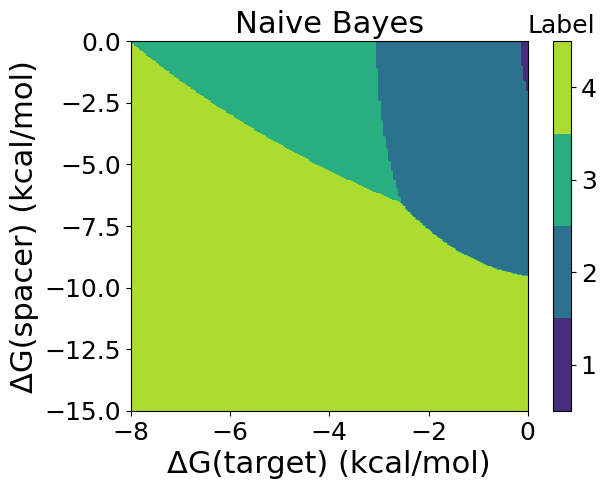

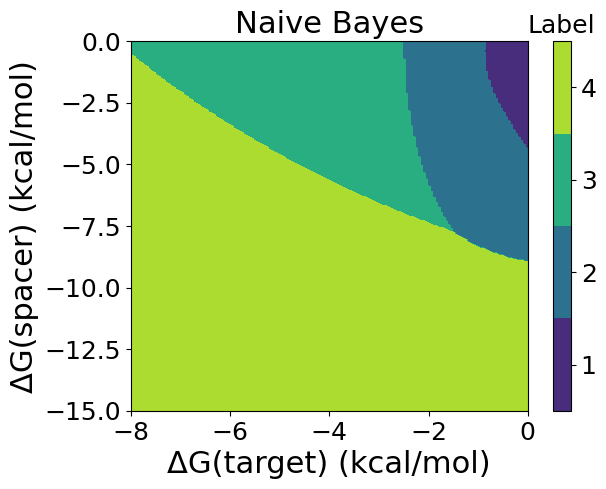

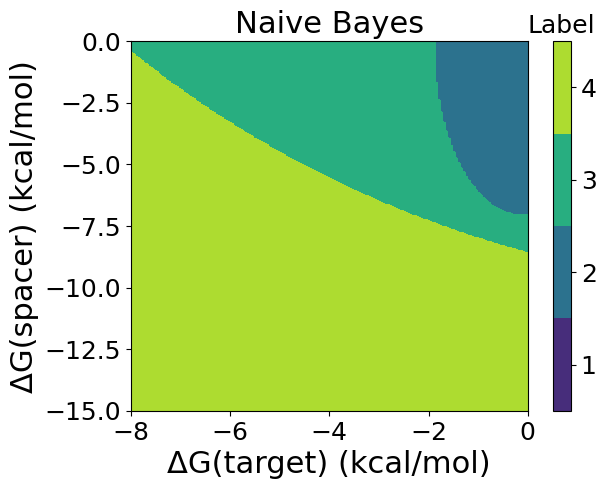

In [6]:
# Naive Bayes-logarithm difference-ssDNA (77 targets)-60 nM-spacer + target + hybrid-tomography

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import seaborn as sns

# Input logarithm of trans-cleavage rate and energy data
crRNA_short = [-7.5986, -7.9136, -13.0978, -13.7063, -5.4186, -9.5198, -10.3969, -14.6313, -5.2037, -6.2136, -5.7124, -11.9929, -3.8269, -3.6281, -7.8096, -7.5159, -2.7415, -2.9822, -6.325, -5.2217, -2.7343, -2.7278, -4.2134, -4.23, -0.1286, -0.1312, -0.1262, -0.114, -0.2125]
crRNA_long = [-7.5986, -7.9136, -13.0978, -13.7063, -0.1286, -0.1262, -0.114, -0.2125, -5.4186, -9.5198, -10.3969, -14.6313, -0.1312, -0.1262, -0.114, -0.2125, -5.2037, -6.2136, -5.7124, -11.9929, -0.1312, -0.1262, -0.114, -0.2125, -3.8269, -3.6281, -7.8096, -7.5159, -0.1312, -0.1262, -0.114, -0.2125, -2.7415, -2.9822, -6.325, -5.2217, -0.1312, -0.1262, -0.114, -0.2125, -2.7343, -2.7278, -4.2134, -4.23, -0.1312, -0.1262, -0.114, -0.2125]

DNA_short = [-3.729, -1.5845, -4.546, -4.983, -3.477, -3.5708, -0.6474, -7.7395, -2.5788, -0.3742, -2.6783, -5.4146, -1.835, -0.3073, -3.9449, -1.812, -0.952, -0.2431, -1.9231, -0.4985, -0.5696, -0.5424, -1.5467, -1.5761, -0.1835, -0.1166, -0.1512, -0.0723, -0.374]
DNA_long = [-3.3092, -1.1093, -5.5261, -4.3378, 0.3363, -1.5971, -4.0898, -0.9542, -2.9901, -3.5997, 0.5946, -8.0181, 0.4028, -1.3072, -3.9041, -1.0676, -2.1199, 0.5894, -2.1163, -5.2779, 0.4773, -1.2496, -3.8546, -0.9702, -1.373, 0.6586, -4.0277, -3.1558, 0.2156, -0.1158, -1.4255, -4.0676, -0.201, -1.4468, -7.214, -2.7169, 0.3884, -0.8365, -3.4617, -2.3248, -0.9932, -2.6728, -2.2828, -2.1059, 0.3698, -1.2188, -3.6771, -1.0626]

rate_short = [0.74999, 2.92414, 0.9369, 0.94607, 1.82063, 1.42018, 3.21536, -1, 2.21983, 3.52545, 3.46257, 0.0851, 3.11362, 3.47337, 1.91024, 3.08837, 3.22065, 3.49578, 3.33369, 3.19545, 3.23225, 3.27768, 3.28911, 3.16849, 3.44665, 3.50358, 3.40417, 3.30497, 3.29992]
rate_long = [1.61041, 2.39507, -0.70309, 0.72694, 2.97138, 3.04819, 2.80491, 2.83112, 2.63976, 1.55271, 2.398, -1, 3.0623, 3.09264, 2.82318, 2.58749, 2.76825, 3.24625, 2.66222, 0.9431, 3.15163, 3.1303, 3.07722, 2.95174, 3.04572, 3.19892, 2.17761, 2.43041, 3.00227, 3.06187, 2.86628, 2.6737, 3.21738, 3.05514, 2.72836, 3.0101, 3.14338, 3.28634, 3.05054, 3.00324, 2.97693, 2.93967, 2.49717, 2.69684, 3.05162, 2.95531, 2.745, 2.69177]

hybrid = [-19.4, -23.4, -30.0, -36.3, -18.25, -24.5, -29.95, -37.3, -19.55, -23.55, -28.85, -36.2, -17.4, -22.55, -31.2, -35.4, -20.25, -23.6, -32.5, -37.2, -20.7, -23.15, -30.5, -36.0, -17.1, -21.3, -20.95, -28.9, -34.5, -19.40, -23.40, -30.00, -36.30, -17.10, -20.95, -28.90, -34.50, -18.25, -24.50, -29.95, -37.30, -21.30, -20.95, -28.90, -34.50, -19.55, -23.55, -28.85, -36.20, -21.30, -20.95, -28.90, -34.50, -17.40, -22.55, -31.20, -35.40, -21.30, -20.95, -28.90, -34.50, -20.25, -23.60, -32.50, -37.20, -21.30, -20.95, -28.90, -34.50, -20.70, -23.15, -30.50, -36.00, -21.30, -20.95, -28.90, -34.50]

max_rate_short = max(rate_short)
max_rate_long = max(rate_long)

rate_dif = []

# Calculate rate differences
for j in range (0, len(rate_short)):
    rate_difference = max_rate_short - rate_short[j] 
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)
    
for j in range (0, len(rate_long)):
    rate_difference = max_rate_long - rate_long[j]
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)


# Combine the data from short and long strands, the standard rate (highest) was different for short and long targets 
crRNA = crRNA_short + crRNA_long
DNA = DNA_short + DNA_long
hybrid = hybrid

X = []
X_unit = []
Y = []

# Labeling thresholds are set as the 25th, 50th, 75th percentile of log difference of trans-cleavage rates
quartile = int(len(rate_dif)/4)
sorted_rate_dif = sorted(rate_dif)


# Labeling with 4 labels
for i in range (0, len(crRNA)):
    X_unit.append(crRNA[i])
    X_unit.append(DNA[i])
    X_unit.append(hybrid[i])
    X.append(X_unit)
    X_unit = []
    if rate_dif[i] <= sorted_rate_dif[quartile-1]:
        Y.append(0)
    elif rate_dif[i] <= sorted_rate_dif[2*quartile-1]:
        Y.append(1)
    elif rate_dif[i] <= sorted_rate_dif[3*quartile-1]:
        Y.append(2)
    else:
        Y.append(3)
    
        
# Naive Bayes Classification and accuracy test
clf = GaussianNB()
print("Max accuracy score:")

# Perform 10000 trials for model training, get the model with the highest accuracy score
score = 0
r = 0
max_r = 0
max_score = 0
with open('output.txt', 'w') as f:
    while r < 10000:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=r)    # train: test = 4: 1
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = accuracy_score(y_test, preds)
        f.write(str(score) + '\n')
        if score > max_score:
            max_score = score
            max_r = r
        r += 1

print(max_score)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=max_r)    # train: test = 4: 1
clf.fit(X_train, y_train)

# Prediction of classification results for every energy combination throughout the map
o_array = [-17, -25, -32]
for o in o_array:
    Z_value = []
    Z_value_unit = []
    for m in np.arange(-15, 0, 0.05):
        for n in np.arange(-8, 0, 0.05):
            prediction = clf.predict([[m,n,o]])
            Z_value_unit.append(prediction[0])
            
        Z_value.append(Z_value_unit)
        Z_value_unit = []
    
    # Create the map
    n = 4
    ylist = np.linspace(-15, 0, 300)
    xlist = np.linspace(-8, 0, 160)
    X_plot, Y_plot = np.meshgrid(xlist, ylist)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X_plot, Y_plot, Z_value, levels = list(range(-1, n)))
    cbar = fig.colorbar(cp, ticks=np.linspace(0,n-1,n), spacing = 'proportional' ) # Add a colorbar to a plot
    tick_locs = np.linspace(-1, n-1, 2 * n + 1)[1::2]
    cbar_tick_label = np.arange(1, n+1)
    cbar.set_ticks(tick_locs)
    cbar.set_ticklabels(cbar_tick_label)

    from textwrap import wrap 
    char_tick_title = 'Label'
    char_tick_title =  '\n'.join(wrap(char_tick_title, 8))
    cbar.ax.set_title(char_tick_title, fontsize = 18)
    cbar.ax.tick_params(labelsize=18)
    ax.set_title('Naive Bayes', fontsize = 22)
    ax.set_xlabel('ΔG(target) (kcal/mol)', fontsize = 22)
    ax.set_ylabel('ΔG(spacer) (kcal/mol)', fontsize = 22)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()




Max accuracy score:
0.9375


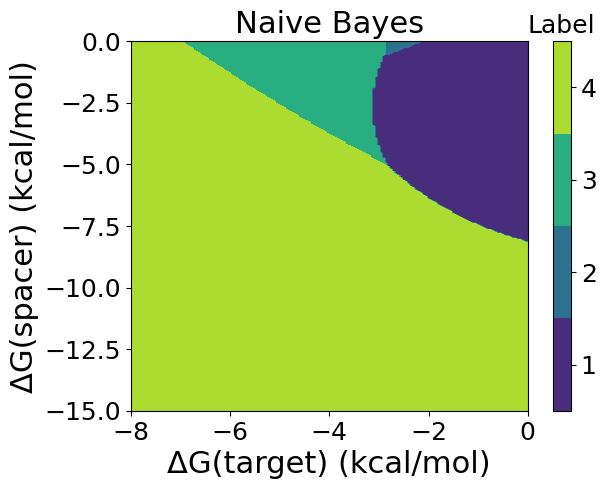

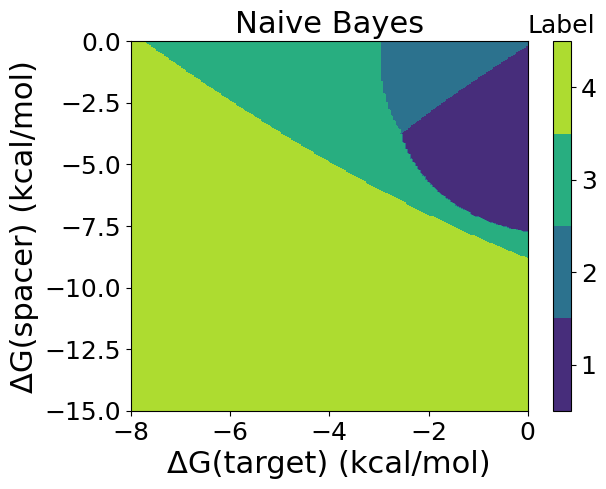

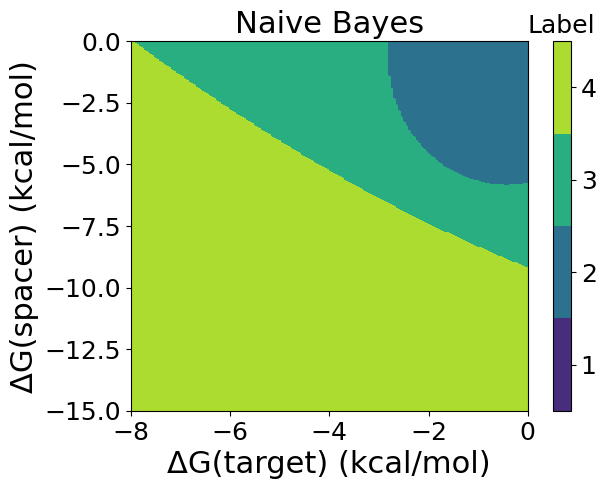

In [7]:
# Naive Bayes-logarithm difference-ssDNA (77 targets)-6 nM-spacer + target + hybrid-tomography

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import seaborn as sns

# Input logarithm of trans-cleavage rate and energy data
crRNA_short = [-7.5986, -7.9136, -13.0978, -13.7063, -5.4186, -9.5198, -10.3969, -14.6313, -5.2037, -6.2136, -5.7124, -11.9929, -3.8269, -3.6281, -7.8096, -7.5159, -2.7415, -2.9822, -6.325, -5.2217, -2.7343, -2.7278, -4.2134, -4.23, -0.1286, -0.1312, -0.1262, -0.114, -0.2125]
crRNA_long = [-7.5986, -7.9136, -13.0978, -13.7063, -0.1286, -0.1262, -0.114, -0.2125, -5.4186, -9.5198, -10.3969, -14.6313, -0.1312, -0.1262, -0.114, -0.2125, -5.2037, -6.2136, -5.7124, -11.9929, -0.1312, -0.1262, -0.114, -0.2125, -3.8269, -3.6281, -7.8096, -7.5159, -0.1312, -0.1262, -0.114, -0.2125, -2.7415, -2.9822, -6.325, -5.2217, -0.1312, -0.1262, -0.114, -0.2125, -2.7343, -2.7278, -4.2134, -4.23, -0.1312, -0.1262, -0.114, -0.2125]

DNA_short = [-3.729, -1.5845, -4.546, -4.983, -3.477, -3.5708, -0.6474, -7.7395, -2.5788, -0.3742, -2.6783, -5.4146, -1.835, -0.3073, -3.9449, -1.812, -0.952, -0.2431, -1.9231, -0.4985, -0.5696, -0.5424, -1.5467, -1.5761, -0.1835, -0.1166, -0.1512, -0.0723, -0.374]
DNA_long = [-3.3092, -1.1093, -5.5261, -4.3378, 0.3363, -1.5971, -4.0898, -0.9542, -2.9901, -3.5997, 0.5946, -8.0181, 0.4028, -1.3072, -3.9041, -1.0676, -2.1199, 0.5894, -2.1163, -5.2779, 0.4773, -1.2496, -3.8546, -0.9702, -1.373, 0.6586, -4.0277, -3.1558, 0.2156, -0.1158, -1.4255, -4.0676, -0.201, -1.4468, -7.214, -2.7169, 0.3884, -0.8365, -3.4617, -2.3248, -0.9932, -2.6728, -2.2828, -2.1059, 0.3698, -1.2188, -3.6771, -1.0626]

rate_short = [-1, 2.61633, -0.5011, -0.48816, 0.88024, -0.34514, 2.77505, -1, 1.39694, 3.13047, 3.14885, -1, 2.52339, 3.09036, 0.80304, 2.5952, 2.64645, 3.28507, 2.91951, 2.96013, 2.7354, 3.09433, 2.97987, 2.71399, 3.11449, 3.11243, 3.10775, 2.97171, 3.15861]
rate_long = [1.72835, 2.57734, 0.55117, 0.01462, 2.38942, 2.47027, 2.3538, 2.4708, 2.87604, 1.69769, 2.31272, -1, 2.60403, 2.43818, 2.35319, 2.4187, 2.34315, 3.07568, 2.55683, -0.17353, 2.7003, 2.7844, 2.70431, 2.75633, 2.96165, 2.96995, 1.68934, 2.09749, 2.69098, 2.53757, 2.45888, 2.43664, 3.01239, 2.7708, 2.37918, 2.3908, 2.75999, 2.77006, 2.59073, 2.6846, 3.05061, 3.04769, 2.78607, 2.73223, 2.89054, 2.84042, 2.78704, 2.77866]

hybrid = [-19.4, -23.4, -30.0, -36.3, -18.25, -24.5, -29.95, -37.3, -19.55, -23.55, -28.85, -36.2, -17.4, -22.55, -31.2, -35.4, -20.25, -23.6, -32.5, -37.2, -20.7, -23.15, -30.5, -36.0, -17.1, -21.3, -20.95, -28.9, -34.5, -19.40, -23.40, -30.00, -36.30, -17.10, -20.95, -28.90, -34.50, -18.25, -24.50, -29.95, -37.30, -21.30, -20.95, -28.90, -34.50, -19.55, -23.55, -28.85, -36.20, -21.30, -20.95, -28.90, -34.50, -17.40, -22.55, -31.20, -35.40, -21.30, -20.95, -28.90, -34.50, -20.25, -23.60, -32.50, -37.20, -21.30, -20.95, -28.90, -34.50, -20.70, -23.15, -30.50, -36.00, -21.30, -20.95, -28.90, -34.50]

max_rate_short = max(rate_short)
max_rate_long = max(rate_long)

rate_dif = []

# Calculate rate differences
for j in range (0, len(rate_short)):
    rate_difference = max_rate_short - rate_short[j] 
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)
    
for j in range (0, len(rate_long)):
    rate_difference = max_rate_long - rate_long[j]
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)


# Combine the data from short and long strands, the standard rate (highest) was different for short and long targets 
crRNA = crRNA_short + crRNA_long
DNA = DNA_short + DNA_long
hybrid = hybrid

X = []
X_unit = []
Y = []

# Labeling thresholds are set as the 25th, 50th, 75th percentile of log difference of trans-cleavage rates
quartile = int(len(rate_dif)/4)
sorted_rate_dif = sorted(rate_dif)


# Labeling with 4 labels
for i in range (0, len(crRNA)):
    X_unit.append(crRNA[i])
    X_unit.append(DNA[i])
    X_unit.append(hybrid[i])
    X.append(X_unit)
    X_unit = []
    if rate_dif[i] <= sorted_rate_dif[quartile-1]:
        Y.append(0)
    elif rate_dif[i] <= sorted_rate_dif[2*quartile-1]:
        Y.append(1)
    elif rate_dif[i] <= sorted_rate_dif[3*quartile-1]:
        Y.append(2)
    else:
        Y.append(3)
    
        
# Naive Bayes Classification and accuracy test
clf = GaussianNB()
print("Max accuracy score:")

# Perform 10000 trials for model training, get the model with the highest accuracy score
score = 0
r = 0
max_r = 0
max_score = 0

with open('output.txt', 'w') as f:
    while r < 10000:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=r)    # train: test = 4: 1
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = accuracy_score(y_test, preds)
        f.write(str(score) + '\n')
        if score > max_score:
            max_score = score
            max_r = r
        r += 1

print(max_score)    

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=max_r)    # train: test = 4: 1
clf.fit(X_train, y_train)

# Prediction of classification results for every energy combination throughout the map
o_array = [-17, -25, -32]
for o in o_array:
    Z_value = []
    Z_value_unit = []
    for m in np.arange(-15, 0, 0.05):
        for n in np.arange(-8, 0, 0.05):
            prediction = clf.predict([[m,n,o]])
            Z_value_unit.append(prediction[0])
            
        Z_value.append(Z_value_unit)
        Z_value_unit = []
    
    # Create the map
    n = 4
    ylist = np.linspace(-15, 0, 300)
    xlist = np.linspace(-8, 0, 160)
    X_plot, Y_plot = np.meshgrid(xlist, ylist)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X_plot, Y_plot, Z_value, levels = list(range(-1, n)))
    cbar = fig.colorbar(cp, ticks=np.linspace(0,n-1,n), spacing = 'proportional' ) # Add a colorbar to a plot
    tick_locs = np.linspace(-1, n-1, 2 * n + 1)[1::2]
    cbar_tick_label = np.arange(1, n+1)
    cbar.set_ticks(tick_locs)
    cbar.set_ticklabels(cbar_tick_label)

    from textwrap import wrap 
    char_tick_title = 'Label'
    char_tick_title =  '\n'.join(wrap(char_tick_title, 8))
    cbar.ax.set_title(char_tick_title, fontsize = 18)
    cbar.ax.tick_params(labelsize=18)
    ax.set_title('Naive Bayes', fontsize = 22)
    ax.set_xlabel('ΔG(target) (kcal/mol)', fontsize = 22)
    ax.set_ylabel('ΔG(spacer) (kcal/mol)', fontsize = 22)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()



Max accuracy score:
0.8125


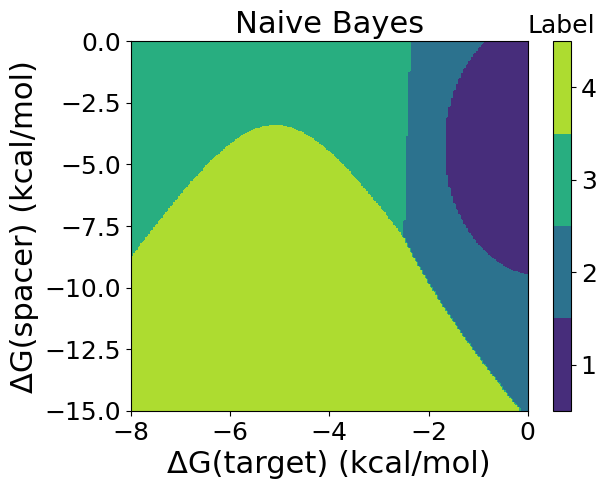

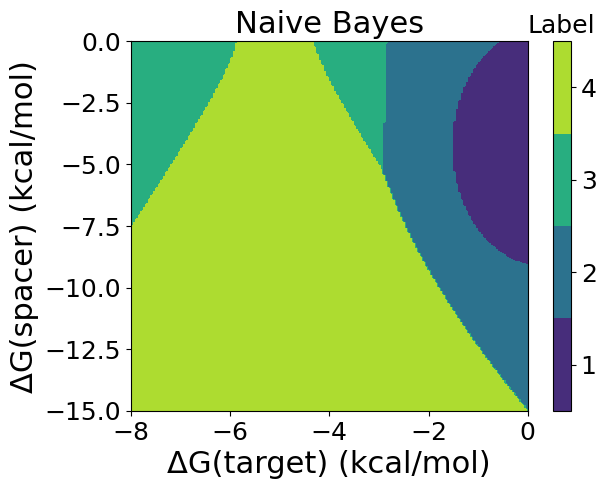

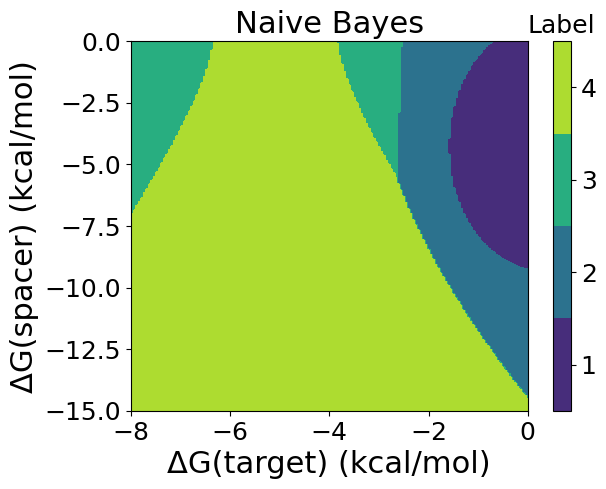

In [8]:
# Naive Bayes-logarithm difference-ssDNA (77 targets)-600 pM-spacer + target + hybrid-tomography

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import seaborn as sns

# Input logarithm of trans-cleavage rate and energy data
crRNA_short = [-7.5986, -7.9136, -13.0978, -13.7063, -5.4186, -9.5198, -10.3969, -14.6313, -5.2037, -6.2136, -5.7124, -11.9929, -3.8269, -3.6281, -7.8096, -7.5159, -2.7415, -2.9822, -6.325, -5.2217, -2.7343, -2.7278, -4.2134, -4.23, -0.1286, -0.1312, -0.1262, -0.114, -0.2125]
crRNA_long = [-7.5986, -7.9136, -13.0978, -13.7063, -0.1286, -0.1262, -0.114, -0.2125, -5.4186, -9.5198, -10.3969, -14.6313, -0.1312, -0.1262, -0.114, -0.2125, -5.2037, -6.2136, -5.7124, -11.9929, -0.1312, -0.1262, -0.114, -0.2125, -3.8269, -3.6281, -7.8096, -7.5159, -0.1312, -0.1262, -0.114, -0.2125, -2.7415, -2.9822, -6.325, -5.2217, -0.1312, -0.1262, -0.114, -0.2125, -2.7343, -2.7278, -4.2134, -4.23, -0.1312, -0.1262, -0.114, -0.2125]

DNA_short = [-3.729, -1.5845, -4.546, -4.983, -3.477, -3.5708, -0.6474, -7.7395, -2.5788, -0.3742, -2.6783, -5.4146, -1.835, -0.3073, -3.9449, -1.812, -0.952, -0.2431, -1.9231, -0.4985, -0.5696, -0.5424, -1.5467, -1.5761, -0.1835, -0.1166, -0.1512, -0.0723, -0.374]
DNA_long = [-3.3092, -1.1093, -5.5261, -4.3378, 0.3363, -1.5971, -4.0898, -0.9542, -2.9901, -3.5997, 0.5946, -8.0181, 0.4028, -1.3072, -3.9041, -1.0676, -2.1199, 0.5894, -2.1163, -5.2779, 0.4773, -1.2496, -3.8546, -0.9702, -1.373, 0.6586, -4.0277, -3.1558, 0.2156, -0.1158, -1.4255, -4.0676, -0.201, -1.4468, -7.214, -2.7169, 0.3884, -0.8365, -3.4617, -2.3248, -0.9932, -2.6728, -2.2828, -2.1059, 0.3698, -1.2188, -3.6771, -1.0626]

rate_short = [-1, 1.88846, -1, -1, -1, -0.57356, 1.5058, -1, -1, 1.76669, 1.84435, -1, 1.01352, 1.56052, -1, 1.47409, 1.52443, 1.37974, 1.12841, 1.56316, 1.4894, 1.29897, 1.66851, 1.07674, 1.67592, 1.82681, 1.97693, 1.34153, 1.79451]
rate_long = [1.15231, 2.03489, -1, -0.53201, 1.45447, 1.69772, 1.35647, 1.66488, 2.19383, 1.16716, 1.66206, -1, 1.75583, 1.56713, 1.3238, 1.48061, 1.69583, 2.32187, 1.87989, -1, 1.86532, 1.94448, 1.89746, 2.03421, 2.31504, 2.40192, 1.00502, 1.34107, 1.92617, 1.69931, 1.38279, 1.47595, 2.33087, 2.09432, 1.76251, 1.59037, 1.95256, 1.94089, 1.78121, 1.8165, 2.53181, 2.73964, 2.31188, 2.28092, 2.30962, 2.27799, 2.07021, 2.29538]

hybrid = [-19.4, -23.4, -30.0, -36.3, -18.25, -24.5, -29.95, -37.3, -19.55, -23.55, -28.85, -36.2, -17.4, -22.55, -31.2, -35.4, -20.25, -23.6, -32.5, -37.2, -20.7, -23.15, -30.5, -36.0, -17.1, -21.3, -20.95, -28.9, -34.5, -19.40, -23.40, -30.00, -36.30, -17.10, -20.95, -28.90, -34.50, -18.25, -24.50, -29.95, -37.30, -21.30, -20.95, -28.90, -34.50, -19.55, -23.55, -28.85, -36.20, -21.30, -20.95, -28.90, -34.50, -17.40, -22.55, -31.20, -35.40, -21.30, -20.95, -28.90, -34.50, -20.25, -23.60, -32.50, -37.20, -21.30, -20.95, -28.90, -34.50, -20.70, -23.15, -30.50, -36.00, -21.30, -20.95, -28.90, -34.50]

max_rate_short = max(rate_short)
max_rate_long = max(rate_long)

rate_dif = []

# Calculate rate differences
for j in range (0, len(rate_short)):
    rate_difference = max_rate_short - rate_short[j] 
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)
    
for j in range (0, len(rate_long)):
    rate_difference = max_rate_long - rate_long[j]
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)


# Combine the data from short and long strands, the standard rate (highest) was different for short and long targets 
crRNA = crRNA_short + crRNA_long
DNA = DNA_short + DNA_long
hybrid = hybrid

X = []
X_unit = []
Y = []

# Labeling thresholds are set as the 25th, 50th, 75th percentile of log difference of trans-cleavage rates
quartile = int(len(rate_dif)/4)
sorted_rate_dif = sorted(rate_dif)


# Labeling with 4 labels
for i in range (0, len(crRNA)):
    X_unit.append(crRNA[i])
    X_unit.append(DNA[i])
    X_unit.append(hybrid[i])
    X.append(X_unit)
    X_unit = []
    if rate_dif[i] <= sorted_rate_dif[quartile-1]:
        Y.append(0)
    elif rate_dif[i] <= sorted_rate_dif[2*quartile-1]:
        Y.append(1)
    elif rate_dif[i] <= sorted_rate_dif[3*quartile-1]:
        Y.append(2)
    else:
        Y.append(3)
    
        
# Naive Bayes Classification and accuracy test
clf = GaussianNB()
print("Max accuracy score:")

# Perform 10000 trials for model training, get the model with the highest accuracy score
score = 0
r = 0
max_r = 0
max_score = 0

with open('output.txt', 'w') as f:
    while r < 10000:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=r)    # train: test = 4: 1
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = accuracy_score(y_test, preds)
        f.write(str(score) + '\n')
        if score > max_score:
            max_score = score
            max_r = r
        r += 1

print(max_score)    

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=max_r)    # train: test = 4: 1
clf.fit(X_train, y_train)

# Prediction of classification results for every energy combination throughout the map
o_array = [-17, -25, -32]
for o in o_array:
    Z_value = []
    Z_value_unit = []
    for m in np.arange(-15, 0, 0.05):
        for n in np.arange(-8, 0, 0.05):
            prediction = clf.predict([[m,n,o]])
            Z_value_unit.append(prediction[0])
            
        Z_value.append(Z_value_unit)
        Z_value_unit = []
    
    # Create the map
    n = 4
    ylist = np.linspace(-15, 0, 300)
    xlist = np.linspace(-8, 0, 160)
    X_plot, Y_plot = np.meshgrid(xlist, ylist)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X_plot, Y_plot, Z_value, levels = list(range(-1, n)))
    cbar = fig.colorbar(cp, ticks=np.linspace(0,n-1,n), spacing = 'proportional' ) # Add a colorbar to a plot
    tick_locs = np.linspace(-1, n-1, 2 * n + 1)[1::2]
    cbar_tick_label = np.arange(1, n+1)
    cbar.set_ticks(tick_locs)
    cbar.set_ticklabels(cbar_tick_label)
    
    from textwrap import wrap 
    char_tick_title = 'Label'
    char_tick_title =  '\n'.join(wrap(char_tick_title, 8))
    cbar.ax.set_title(char_tick_title, fontsize = 18)
    cbar.ax.tick_params(labelsize=18)
    ax.set_title('Naive Bayes', fontsize = 22)
    ax.set_xlabel('ΔG(target) (kcal/mol)', fontsize = 22)
    ax.set_ylabel('ΔG(spacer) (kcal/mol)', fontsize = 22)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()




Max accuracy score:
0.72


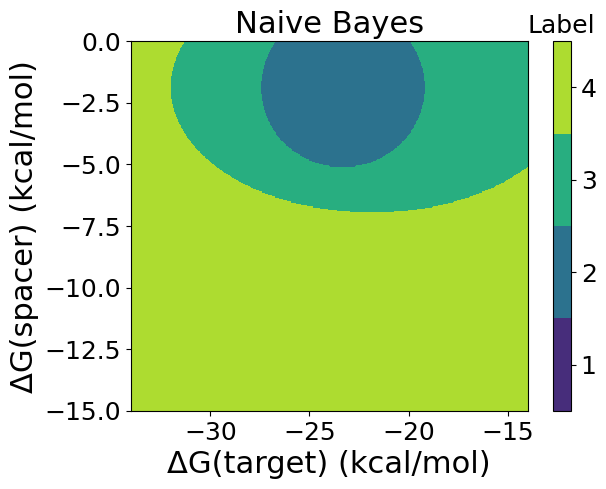

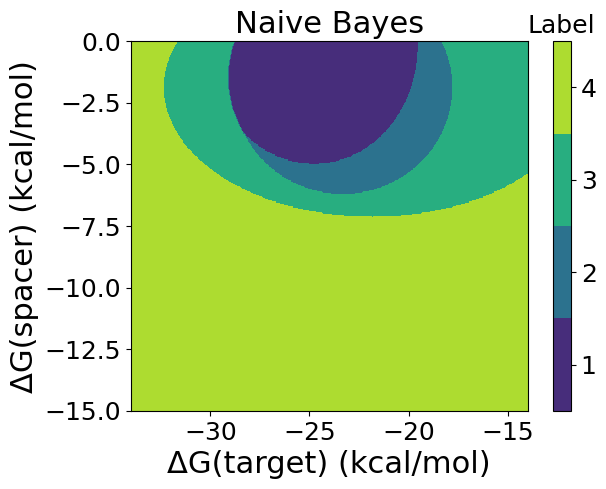

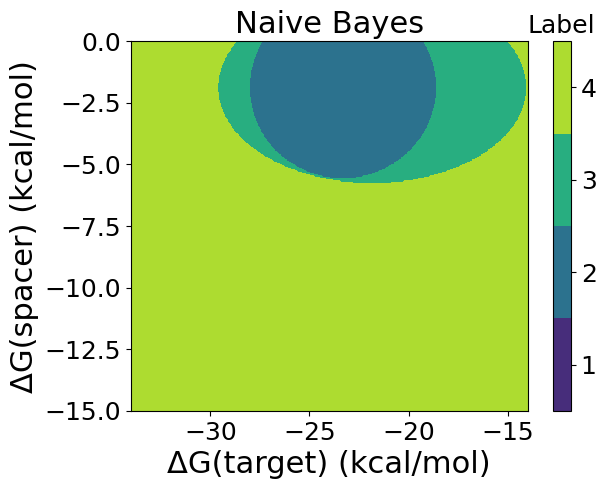

In [9]:
# Naive Bayes-logarithm difference-dsDNA (123 targets)-spacer + target + hybrid-tomography

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import seaborn as sns

# Input logarithm of trans-cleavage rate and energy data
crRNA_original = [-7.5986, -7.9136, -13.0978, -13.7063, -5.4186, -9.5198, -10.3969, -14.6313, -5.2037, -6.2136, -5.7124, -11.9929, -3.8269, -3.6281, -7.8096, -7.5159, -2.7415, -2.9822, -6.325, -5.2217, -2.7343, -2.7278, -4.2134, -4.23, -0.1286, -0.1312, -0.1262, -0.114, -0.2125]
crRNA_extended = [-3.6872, -3.9132, -3.3497, -3.2977, -3.3687, -3.8769, -3.8655, -3.4915, -2.2941, -2.7709, -2.0829, -2.308, -2.0249, -2.9116, -2.2937, -2.5156, -1.9188, -1.4921, -1.4302, -1.5092, -1.1792, -1.1723, -1.3806, -1.0133, -0.8267, -0.9036, -0.9313, -0.8257, -0.4946, -0.5453, -0.7953, -0.6239]
DNA_original = [-17.5571, -22.1671, -26.6771, -31.8671, -20.5671, -22.2371, -27.5471, -31.9571, -20.4571, -22.4471, -28.0871, -31.6471, -20.2571, -22.1071, -27.6571, -32.3471, -18.6971, -23.4871, -27.9871, -31.5371, -20.5171, -22.9171, -28.3971, -32.4171, -19.1371, -20.2371, -22.7871, -25.9971, -31.0671]
DNA_extended = [-26.3971, -29.0371, -24.0471, -24.9971, -23.9871, -23.9871, -19.6371, -20.8171, -26.1171, -27.0371, -24.4971, -24.0871, -22.4171, -22.3371, -20.1271, -19.1071, -26.5471, -26.2171, -25.0571, -24.6371, -22.7471, -22.0271, -17.6171, -20.8171, -27.3071, -26.9571, -24.3571, -24.4971, -22.2671, -22.4871, -16.0771, -20.7471]
crRNA_1 = crRNA_original + crRNA_extended
DNA_1 = DNA_original + DNA_extended

crRNA_2 = [-10.21043, -10.31897, -3.59107, -6.04227, -1.92992, -0.84662, -2.33374, -10.0419, -5.10094, -1.40912, -3.64113, -5.31798, -7.74933, -5.36843, -4.66324, -8.31244, -1.29414, -1.49064, -9.83794, -0.62999, -3.03447, -1.22378, -4.04728, -6.13298, -7.13503, -0.40487, -2.55555, -3.05458, -0.49871, -0.34196, -2.32333, -5.81623, -6.42481, -6.58269, -7.59873, -5.26648, -4.85574, -4.84977, -4.8154, -6.60012, -1.96886, -3.88041, -0.248, -2.11625, -0.73817, -3.68311, -2.08017, -3.06738, -1.39665, -2.49708, -1.49351, -2.66513, -0.32845, -3.96963, -5.58922, -4.06268, -5.24191, -1.59903, -2.27044, -0.89824, -4.24402, -1.77164]
DNA_2 = [-26.0971, -33.0871, -32.3971, -32.3271, -31.0771, -15.6771, -16.0471, -28.5571, -19.5571, -22.8771, -24.1371, -21.5271, -24.1471, -27.5371, -33.4971, -30.4371, -28.6571, -29.3271, -31.7371, -30.4971, -27.9671, -26.6671, -18.9571, -24.9071, -24.2171, -18.4271, -20.6371, -22.7571, -24.4671, -22.1271, -24.2271, -28.2571, -25.4671, -28.5671, -26.3871, -22.1471, -21.4771, -20.6171, -20.9071, -24.5871, -17.8971, -17.9671, -19.9371, -19.2171, -20.9471, -20.1071, -26.8571, -27.2871, -28.9571, -28.7871, -30.0371, -23.9271, -23.5271, -23.8271, -23.1671, -24.9771, -24.7071, -24.6771, -21.8771, -22.7671, -22.6871, -23.5071]

rate_1 = [0.94663, 1.4441, 0.01471, -1, 1.60882, 1.1326, 1.54111, -1, 1.29748, 1.83268, 1.45537, -0.1316, 1.50956, 1.61665, 1.08649, 1.05226, 1.28802, 1.17626, 0.68513, 1.06599, 1.53351, 1.66034, 1.5597, 1.55331, 1.61536, 1.77585, 2.03833, 1.8565, 1.45537, 2.20637, 2.07194, 2.04671, 2.14228, 2.17485, 1.69791, 2.0997, 1.95705, 1.91463, 2.01451, 2.16264, 2.1909, 2.01191, 2.23193, 2.02957, 2.01711, 1.73804, 2.05574, 2.06023, 1.3793, 1.94409, 2.1995, 1.75531, 1.5359, 1.16199, 2.14388, 1.44248, 2.17899, 1.90692, 2.11142, 0.19279, 2.01117]
rate_2 = [2.40977, 1.11684, 1.99767, 2.45298, 2.65279, 2.67795, 2.21553, 2.23479, 2.67124, 2.78685, 2.82337, 2.76037, 2.83733, 2.43162, 2.67699, 2.53314, 2.54116, 2.87282, 2.16811, 2.77567, 2.6084, 2.77605, 2.63513, 2.90945, 2.64745, 2.92935, 2.35625, 2.44875, 2.74611, 2.95344, 2.90408, 2.80249, 2.1647, 2.71298, 2.85594, 2.84159, 2.79531, 2.91428, 2.4945, 2.41342, 2.87747, 2.62188, 2.70955, 2.75472, 2.71971, 2.74356, 2.90405, 2.95166, 2.9409, 2.87829, 2.48569, 2.96103, 2.91606, 2.84118, 2.76878, 2.86392, 2.78637, 2.9272, 2.83639, 2.94576, 2.95162, 2.68594]

hybrid = [-19.40, -23.40, -30.00, -36.30, -18.25, -24.50, -29.95, -37.30, -19.55, -23.55, -28.85, -36.20, -17.40, -22.55, -31.20, -35.40, -20.25, -23.60, -32.50, -37.20, -20.70, -23.15, -30.50, -36.00, -17.10, -21.30, -20.95, -28.90, -34.50, -27.80, -29.25, -27.05, -28.45, -24.40, -25.30, -18.85, -19.95, -29.75, -29.55, -24.00, -26.55, -21.10, -22.35, -16.15, -17.60, -28.80, -30.70, -30.00, -26.75, -23.30, -22.80, -15.45, -23.60, -27.40, -32.85, -27.50, -26.25, -20.90, -24.25, -10.50, -24.35, -28.45, -37.60, -34.50, -34.95, -37.05, -21.65, -14.70, -34.70, -19.20, -25.55, -26.75, -21.70, -25.00, -29.00, -36.55, -33.50, -32.55, -29.80, -34.60, -34.90, -27.95, -29.10, -16.15, -24.60, -24.70, -16.95, -22.75, -23.45, -29.35, -22.55, -27.65, -30.00, -27.30, -31.20, -27.40, -22.90, -21.10, -19.55, -19.45, -27.80, -15.25, -18.15, -17.85, -19.60, -18.65, -19.30, -28.85, -31.35, -30.15, -31.00, -30.25, -27.20, -26.10, -27.55, -26.10, -28.55, -29.35, -23.00, -22.20, -21.70, -25.90, -24.05]

max_rate_1 = max(rate_1)
max_rate_2= max(rate_2)

rate_dif = []

# Calculate rate differences
for j in range (0, len(rate_1)):
    rate_difference = max_rate_1 - rate_1[j] 
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)
    
for j in range (0, len(rate_2)):
    rate_difference = max_rate_2 - rate_2[j]
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)

# Combine the data from short and long strands, the standard rate (highest) was different for synthetic plasmid and lambda DNA experiments
crRNA = crRNA_1 + crRNA_2
DNA = DNA_1 + DNA_2
hybrid = hybrid

X = []
X_unit = []
Y = []

# Labeling thresholds are set as the 25th, 50th, 75th percentile of log difference of trans-cleavage rates
quartile = int(len(rate_dif)/4)
sorted_rate_dif = sorted(rate_dif)


# Labeling with 4 labels
for i in range (0, len(crRNA)):
    X_unit.append(crRNA[i])
    X_unit.append(DNA[i])
    X_unit.append(hybrid[i])
    X.append(X_unit)
    X_unit = []
    if rate_dif[i] <= sorted_rate_dif[quartile-1]:
        Y.append(0)
    elif rate_dif[i] <= sorted_rate_dif[2*quartile-1]:
        Y.append(1)
    elif rate_dif[i] <= sorted_rate_dif[3*quartile-1]:
        Y.append(2)
    else:
        Y.append(3)
    
        
# Naive Bayes Classification and accuracy test
clf = GaussianNB()
print("Max accuracy score:")

# Perform 10000 trials for model training, get the model with the highest accuracy score
score = 0
r = 0
max_r = 0
max_score = 0

with open('output.txt', 'w') as f:
    while r < 10000:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=r)    # train: test = 4: 1
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = accuracy_score(y_test, preds)
        f.write(str(score) + '\n')
        if score > max_score:
            max_score = score
            max_r = r
        r += 1

print(max_score)    

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=max_r)    # train: test = 4: 1
clf.fit(X_train, y_train)

# Prediction of classification results for every energy combination throughout the map
o_array = [-17, -25, -32]
for o in o_array:
    Z_value = []
    Z_value_unit = []
    for m in np.arange(-15, 0, 0.05):
        for n in np.arange(-34, -14, 0.05):
            prediction = clf.predict([[m,n,o]])
            Z_value_unit.append(prediction[0])
            
        Z_value.append(Z_value_unit)
        Z_value_unit = []
    
    
    # Create the map
    n = 4
    ylist = np.linspace(-15, 0, 300)
    xlist = np.linspace(-34, -14, 400)
    X_plot, Y_plot = np.meshgrid(xlist, ylist)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X_plot, Y_plot, Z_value, levels = list(range(-1, n)))
    cbar = fig.colorbar(cp, ticks=np.linspace(0,n-1,n), spacing = 'proportional' ) # Add a colorbar to a plot
    tick_locs = np.linspace(-1, n-1, 2 * n + 1)[1::2]
    cbar_tick_label = np.arange(1, n+1)
    cbar.set_ticks(tick_locs)
    cbar.set_ticklabels(cbar_tick_label)

    from textwrap import wrap 
    char_tick_title = 'Label'
    char_tick_title =  '\n'.join(wrap(char_tick_title, 8))
    cbar.ax.set_title(char_tick_title, fontsize = 18)
    cbar.ax.tick_params(labelsize=18)
    ax.set_title('Naive Bayes', fontsize = 22)
    ax.set_xlabel('ΔG(target) (kcal/mol)', fontsize = 22)
    ax.set_ylabel('ΔG(spacer) (kcal/mol)', fontsize = 22)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()



Max accuracy score:
0.72


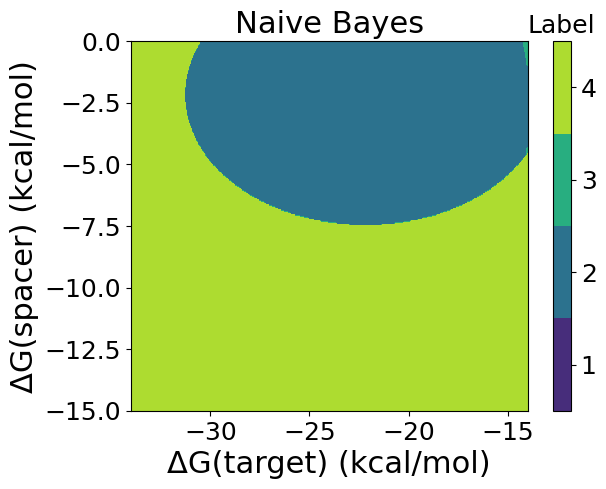

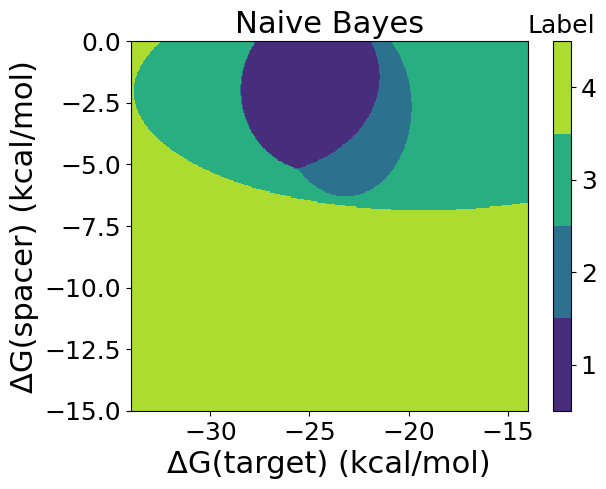

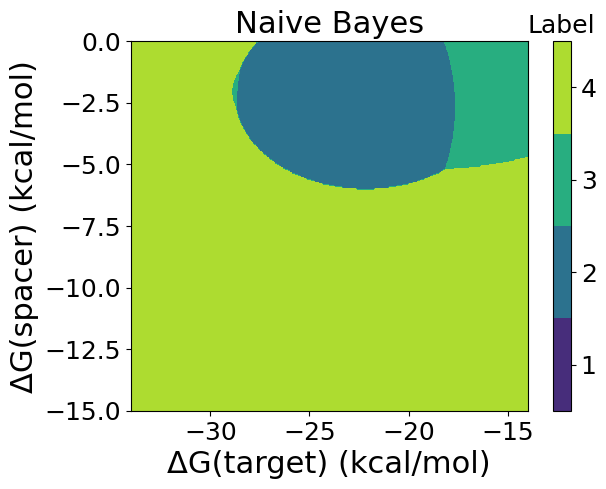

In [10]:
# Naive Bayes-logarithm difference-dsDNA (123 targets)-spacer + target + target hybrid energy difference-tomography

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import seaborn as sns

# Input logarithm of trans-cleavage rate and energy data
crRNA_original = [-7.5986, -7.9136, -13.0978, -13.7063, -5.4186, -9.5198, -10.3969, -14.6313, -5.2037, -6.2136, -5.7124, -11.9929, -3.8269, -3.6281, -7.8096, -7.5159, -2.7415, -2.9822, -6.325, -5.2217, -2.7343, -2.7278, -4.2134, -4.23, -0.1286, -0.1312, -0.1262, -0.114, -0.2125]
crRNA_extended = [-3.6872, -3.9132, -3.3497, -3.2977, -3.3687, -3.8769, -3.8655, -3.4915, -2.2941, -2.7709, -2.0829, -2.308, -2.0249, -2.9116, -2.2937, -2.5156, -1.9188, -1.4921, -1.4302, -1.5092, -1.1792, -1.1723, -1.3806, -1.0133, -0.8267, -0.9036, -0.9313, -0.8257, -0.4946, -0.5453, -0.7953, -0.6239]
DNA_original = [-17.5571, -22.1671, -26.6771, -31.8671, -20.5671, -22.2371, -27.5471, -31.9571, -20.4571, -22.4471, -28.0871, -31.6471, -20.2571, -22.1071, -27.6571, -32.3471, -18.6971, -23.4871, -27.9871, -31.5371, -20.5171, -22.9171, -28.3971, -32.4171, -19.1371, -20.2371, -22.7871, -25.9971, -31.0671]
DNA_extended = [-26.3971, -29.0371, -24.0471, -24.9971, -23.9871, -23.9871, -19.6371, -20.8171, -26.1171, -27.0371, -24.4971, -24.0871, -22.4171, -22.3371, -20.1271, -19.1071, -26.5471, -26.2171, -25.0571, -24.6371, -22.7471, -22.0271, -17.6171, -20.8171, -27.3071, -26.9571, -24.3571, -24.4971, -22.2671, -22.4871, -16.0771, -20.7471]
crRNA_1 = crRNA_original + crRNA_extended
DNA_1 = DNA_original + DNA_extended

crRNA_2 = [-10.21043, -10.31897, -3.59107, -6.04227, -1.92992, -0.84662, -2.33374, -10.0419, -5.10094, -1.40912, -3.64113, -5.31798, -7.74933, -5.36843, -4.66324, -8.31244, -1.29414, -1.49064, -9.83794, -0.62999, -3.03447, -1.22378, -4.04728, -6.13298, -7.13503, -0.40487, -2.55555, -3.05458, -0.49871, -0.34196, -2.32333, -5.81623, -6.42481, -6.58269, -7.59873, -5.26648, -4.85574, -4.84977, -4.8154, -6.60012, -1.96886, -3.88041, -0.248, -2.11625, -0.73817, -3.68311, -2.08017, -3.06738, -1.39665, -2.49708, -1.49351, -2.66513, -0.32845, -3.96963, -5.58922, -4.06268, -5.24191, -1.59903, -2.27044, -0.89824, -4.24402, -1.77164]
DNA_2 = [-26.0971, -33.0871, -32.3971, -32.3271, -31.0771, -15.6771, -16.0471, -28.5571, -19.5571, -22.8771, -24.1371, -21.5271, -24.1471, -27.5371, -33.4971, -30.4371, -28.6571, -29.3271, -31.7371, -30.4971, -27.9671, -26.6671, -18.9571, -24.9071, -24.2171, -18.4271, -20.6371, -22.7571, -24.4671, -22.1271, -24.2271, -28.2571, -25.4671, -28.5671, -26.3871, -22.1471, -21.4771, -20.6171, -20.9071, -24.5871, -17.8971, -17.9671, -19.9371, -19.2171, -20.9471, -20.1071, -26.8571, -27.2871, -28.9571, -28.7871, -30.0371, -23.9271, -23.5271, -23.8271, -23.1671, -24.9771, -24.7071, -24.6771, -21.8771, -22.7671, -22.6871, -23.5071]

rate_1 = [0.94663, 1.4441, 0.01471, -1, 1.60882, 1.1326, 1.54111, -1, 1.29748, 1.83268, 1.45537, -0.1316, 1.50956, 1.61665, 1.08649, 1.05226, 1.28802, 1.17626, 0.68513, 1.06599, 1.53351, 1.66034, 1.5597, 1.55331, 1.61536, 1.77585, 2.03833, 1.8565, 1.45537, 2.20637, 2.07194, 2.04671, 2.14228, 2.17485, 1.69791, 2.0997, 1.95705, 1.91463, 2.01451, 2.16264, 2.1909, 2.01191, 2.23193, 2.02957, 2.01711, 1.73804, 2.05574, 2.06023, 1.3793, 1.94409, 2.1995, 1.75531, 1.5359, 1.16199, 2.14388, 1.44248, 2.17899, 1.90692, 2.11142, 0.19279, 2.01117]
rate_2 = [2.40977, 1.11684, 1.99767, 2.45298, 2.65279, 2.67795, 2.21553, 2.23479, 2.67124, 2.78685, 2.82337, 2.76037, 2.83733, 2.43162, 2.67699, 2.53314, 2.54116, 2.87282, 2.16811, 2.77567, 2.6084, 2.77605, 2.63513, 2.90945, 2.64745, 2.92935, 2.35625, 2.44875, 2.74611, 2.95344, 2.90408, 2.80249, 2.1647, 2.71298, 2.85594, 2.84159, 2.79531, 2.91428, 2.4945, 2.41342, 2.87747, 2.62188, 2.70955, 2.75472, 2.71971, 2.74356, 2.90405, 2.95166, 2.9409, 2.87829, 2.48569, 2.96103, 2.91606, 2.84118, 2.76878, 2.86392, 2.78637, 2.9272, 2.83639, 2.94576, 2.95162, 2.68594]

hybrid = [-19.40, -23.40, -30.00, -36.30, -18.25, -24.50, -29.95, -37.30, -19.55, -23.55, -28.85, -36.20, -17.40, -22.55, -31.20, -35.40, -20.25, -23.60, -32.50, -37.20, -20.70, -23.15, -30.50, -36.00, -17.10, -21.30, -20.95, -28.90, -34.50, -27.80, -29.25, -27.05, -28.45, -24.40, -25.30, -18.85, -19.95, -29.75, -29.55, -24.00, -26.55, -21.10, -22.35, -16.15, -17.60, -28.80, -30.70, -30.00, -26.75, -23.30, -22.80, -15.45, -23.60, -27.40, -32.85, -27.50, -26.25, -20.90, -24.25, -10.50, -24.35, -28.45, -37.60, -34.50, -34.95, -37.05, -21.65, -14.70, -34.70, -19.20, -25.55, -26.75, -21.70, -25.00, -29.00, -36.55, -33.50, -32.55, -29.80, -34.60, -34.90, -27.95, -29.10, -16.15, -24.60, -24.70, -16.95, -22.75, -23.45, -29.35, -22.55, -27.65, -30.00, -27.30, -31.20, -27.40, -22.90, -21.10, -19.55, -19.45, -27.80, -15.25, -18.15, -17.85, -19.60, -18.65, -19.30, -28.85, -31.35, -30.15, -31.00, -30.25, -27.20, -26.10, -27.55, -26.10, -28.55, -29.35, -23.00, -22.20, -21.70, -25.90, -24.05]

max_rate_1 = max(rate_1)
max_rate_2= max(rate_2)

rate_dif = []

# Calculate rate differences
for j in range (0, len(rate_1)):
    rate_difference = max_rate_1 - rate_1[j] 
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)
    
for j in range (0, len(rate_2)):
    rate_difference = max_rate_2 - rate_2[j]
    rate_difference = round(rate_difference, 5)
    rate_dif.append(rate_difference)

# Combine the data from short and long strands, the standard rate (highest) was different for synthetic plasmid and lambda DNA experiments
crRNA = crRNA_1 + crRNA_2
DNA = DNA_1 + DNA_2
hybrid = hybrid

target_hybrid_dif = []
for i in range (0, len(hybrid)):
    target_hybrid_dif.append(DNA[i]-hybrid[i])


X = []
X_unit = []
Y = []

# Labeling thresholds are set as the 25th, 50th, 75th percentile of log difference of trans-cleavage rates
quartile = int(len(rate_dif)/4)
sorted_rate_dif = sorted(rate_dif)


# Labeling with 4 labels
for i in range (0, len(crRNA)):
    X_unit.append(crRNA[i])
    X_unit.append(DNA[i])
    X_unit.append(target_hybrid_dif[i])
    X.append(X_unit)
    X_unit = []
    if rate_dif[i] <= sorted_rate_dif[quartile-1]:
        Y.append(0)
    elif rate_dif[i] <= sorted_rate_dif[2*quartile-1]:
        Y.append(1)
    elif rate_dif[i] <= sorted_rate_dif[3*quartile-1]:
        Y.append(2)
    else:
        Y.append(3)
    
        
# Naive Bayes Classification and accuracy test
clf = GaussianNB()
print("Max accuracy score:")

# Perform 10000 trials for model training, get the model with the highest accuracy score
score = 0
r = 0
max_r = 0
max_score = 0

with open('output.txt', 'w') as f:
    while r < 10000:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=r)    # train: test = 4: 1
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        score = accuracy_score(y_test, preds)
        f.write(str(score) + '\n')
        if score > max_score:
            max_score = score
            max_r = r
        r += 1

print(max_score)    

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=max_r)    # train: test = 4: 1
clf.fit(X_train, y_train)

# Prediction of classification results for every energy combination throughout the map
o_array = [-5, 0, 5]
for o in o_array:
    Z_value = []
    Z_value_unit = []
    for m in np.arange(-15, 0, 0.05):
        for n in np.arange(-34, -14, 0.05):
            prediction = clf.predict([[m,n,o]])
            Z_value_unit.append(prediction[0])
            
        Z_value.append(Z_value_unit)
        Z_value_unit = []
    
    
    # Create the map
    n = 4
    ylist = np.linspace(-15, 0, 300)
    xlist = np.linspace(-34, -14, 400)
    X_plot, Y_plot = np.meshgrid(xlist, ylist)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X_plot, Y_plot, Z_value, levels = list(range(-1, n)))
    cbar = fig.colorbar(cp, ticks=np.linspace(0,n-1,n), spacing = 'proportional' ) # Add a colorbar to a plot
    tick_locs = np.linspace(-1, n-1, 2 * n + 1)[1::2]
    cbar_tick_label = np.arange(1, n+1)
    cbar.set_ticks(tick_locs)
    cbar.set_ticklabels(cbar_tick_label)

    from textwrap import wrap 
    char_tick_title = 'Label'
    char_tick_title =  '\n'.join(wrap(char_tick_title, 8))
    cbar.ax.set_title(char_tick_title, fontsize = 18)
    cbar.ax.tick_params(labelsize=18)
    ax.set_title('Naive Bayes', fontsize = 22)
    ax.set_xlabel('ΔG(target) (kcal/mol)', fontsize = 22)
    ax.set_ylabel('ΔG(spacer) (kcal/mol)', fontsize = 22)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()

